In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (3)\youth_smoking_drug_data_10000_rows_expanded.csv")


In [4]:
df.head(10)

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,15-19,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,15-19,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3
5,2022,70-79,Male,20.14,47.29,High,10,Yes,7,4,No,4,No,4,2
6,2021,30-39,Female,38.38,26.60,Low,4,No,7,1,Yes,2,No,4,10
7,2022,15-19,Female,7.87,54.67,Middle,5,Yes,9,2,No,4,No,4,2
8,2021,70-79,Both,11.61,63.65,Low,9,Yes,1,6,Yes,5,Yes,2,6
9,2020,60-69,Female,23.98,17.62,Low,2,No,3,6,Yes,5,Yes,9,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [6]:
df.isnull().sum()

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64

In [7]:
categorical_columns = ['Age_Group', 'Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education']
for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Age_Group:
Age_Group
15-19    2021
20-24    1045
30-39    1021
60-69    1020
40-49    1001
50-59    1001
80+       979
25-29     974
70-79     938
Name: count, dtype: int64

Gender:
Gender
Both      3415
Male      3294
Female    3291
Name: count, dtype: int64

Socioeconomic_Status:
Socioeconomic_Status
High      3364
Middle    3344
Low       3292
Name: count, dtype: int64

School_Programs:
School_Programs
No     5041
Yes    4959
Name: count, dtype: int64

Access_to_Counseling:
Access_to_Counseling
No     5085
Yes    4915
Name: count, dtype: int64

Substance_Education:
Substance_Education
Yes    5011
No     4989
Name: count, dtype: int64



In [8]:
df.describe()

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


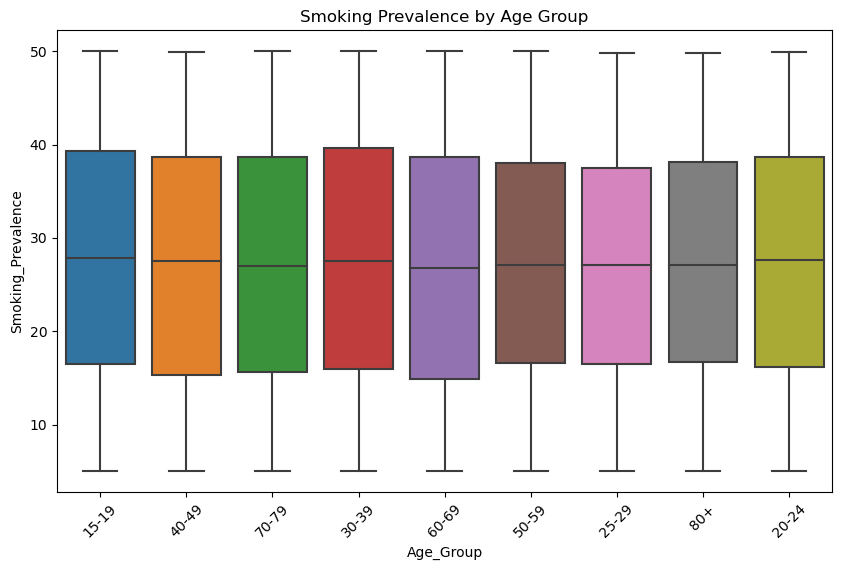

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Smoking_Prevalence', data=df)
plt.title('Smoking Prevalence by Age Group')
plt.xticks(rotation=45)
plt.show()

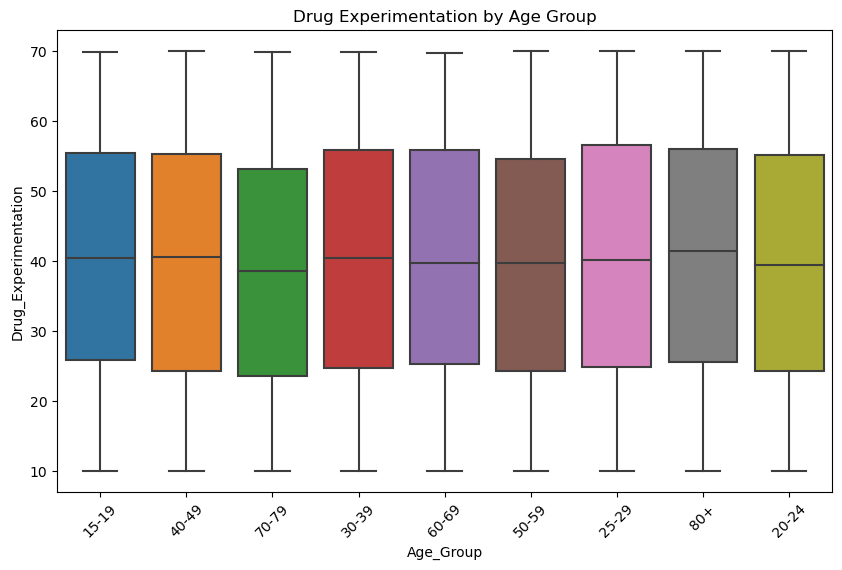

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Drug_Experimentation', data=df)
plt.title('Drug Experimentation by Age Group')
plt.xticks(rotation=45)
plt.show()

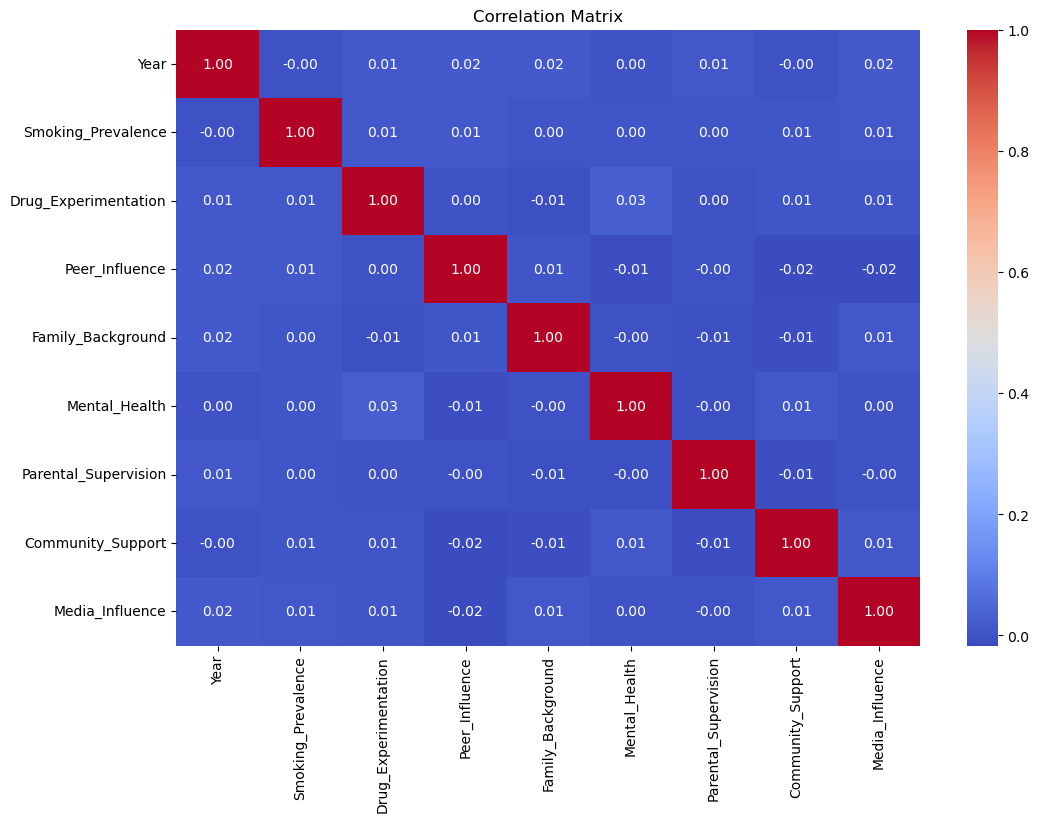

In [11]:
# Drop non-numeric columns if you do not need them for correlation
df_numeric = df.select_dtypes(include=['number'])  # This will keep only numeric columns

# Calculate the correlation matrix
correlation = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


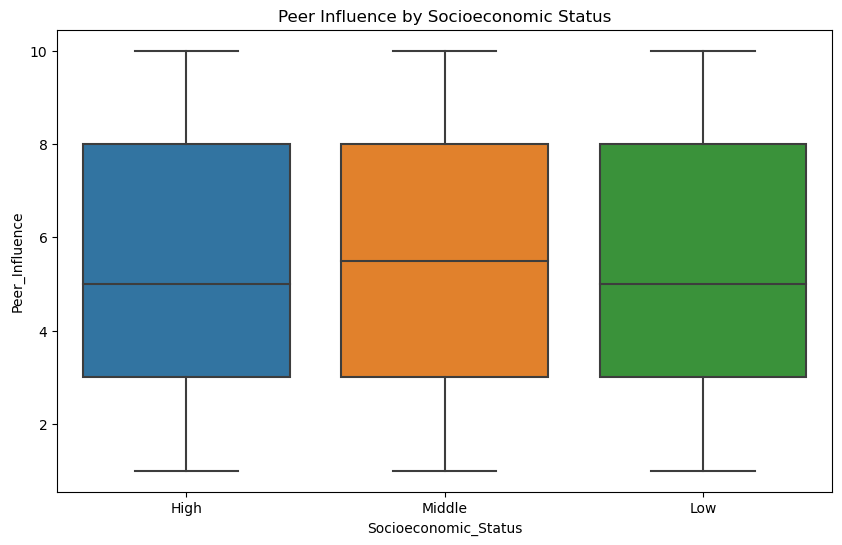

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Socioeconomic_Status', y='Peer_Influence', data=df)
plt.title('Peer Influence by Socioeconomic Status')
plt.show()

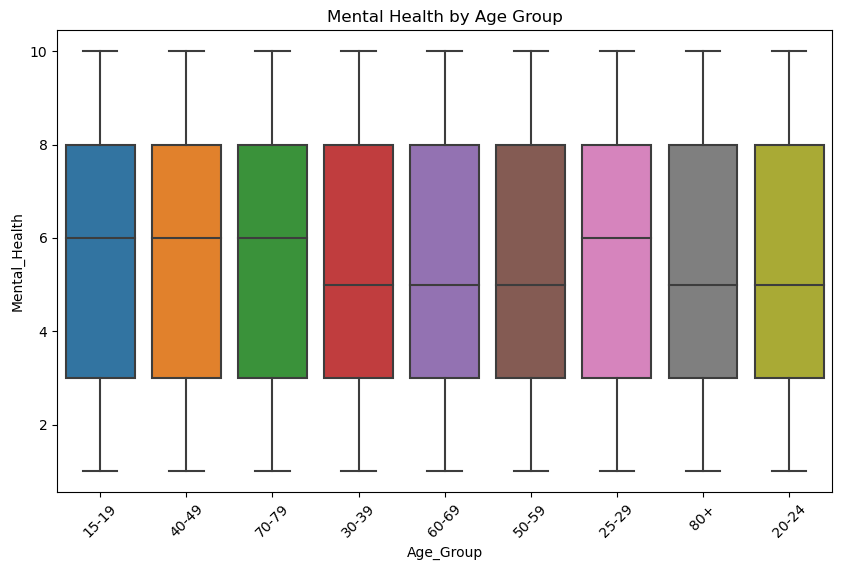

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Mental_Health', data=df)
plt.title('Mental Health by Age Group')
plt.xticks(rotation=45)
plt.show()

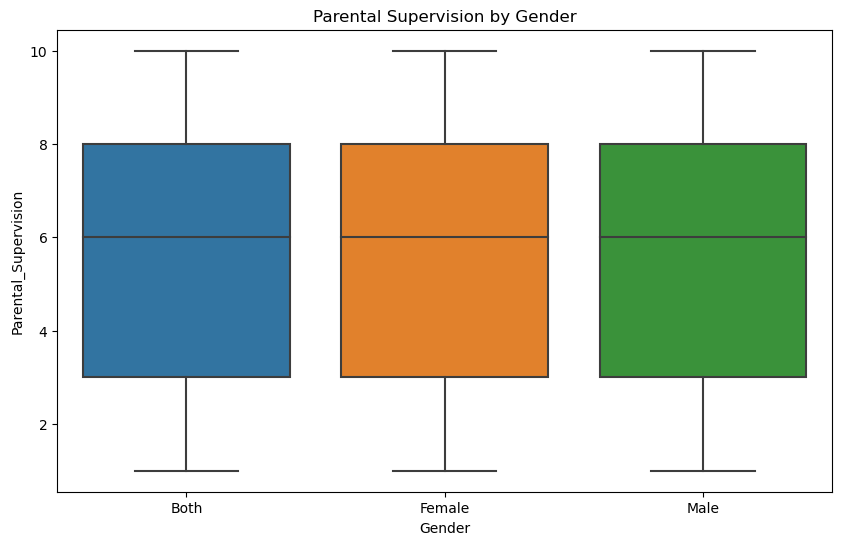

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Parental_Supervision', data=df)
plt.title('Parental Supervision by Gender')
plt.show()

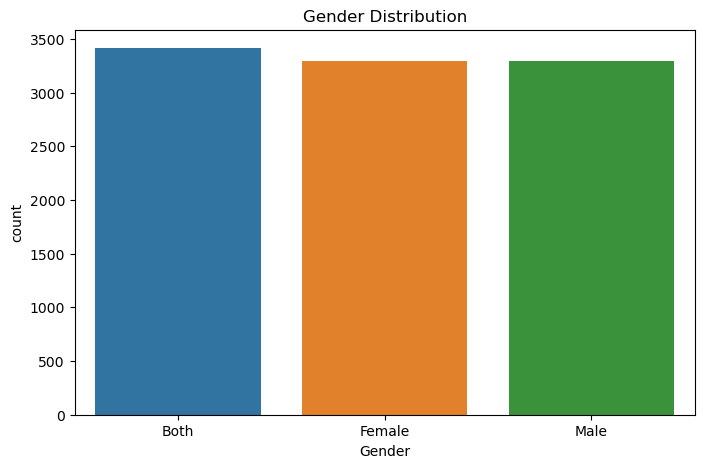

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

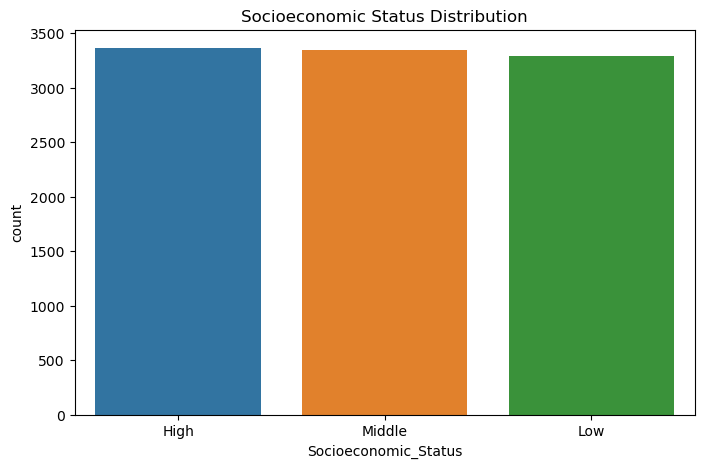

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Socioeconomic_Status', data=df)
plt.title('Socioeconomic Status Distribution')
plt.show()

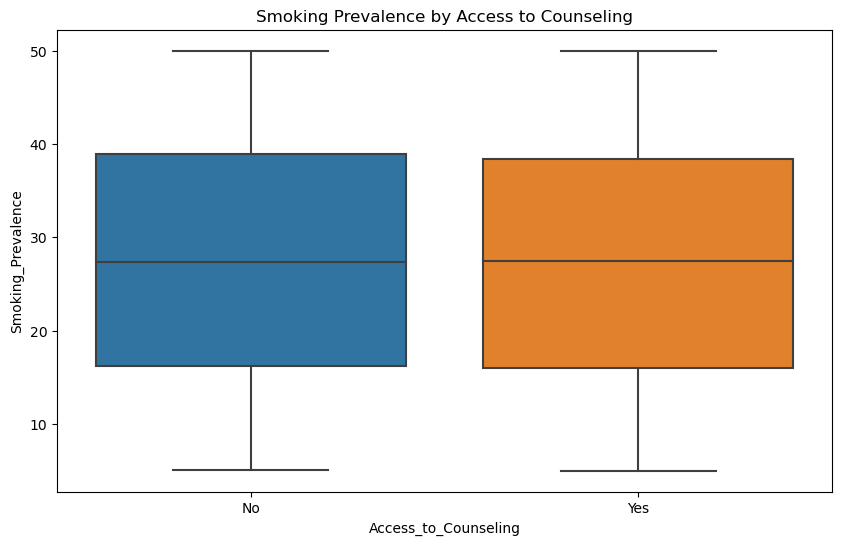

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Access_to_Counseling', y='Smoking_Prevalence', data=df)
plt.title('Smoking Prevalence by Access to Counseling')
plt.show()

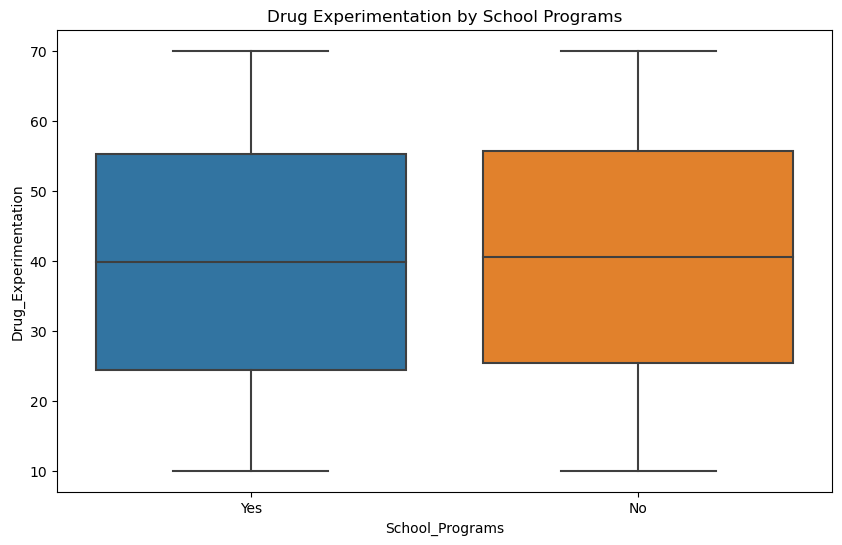

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Programs', y='Drug_Experimentation', data=df)
plt.title('Drug Experimentation by School Programs')
plt.show()

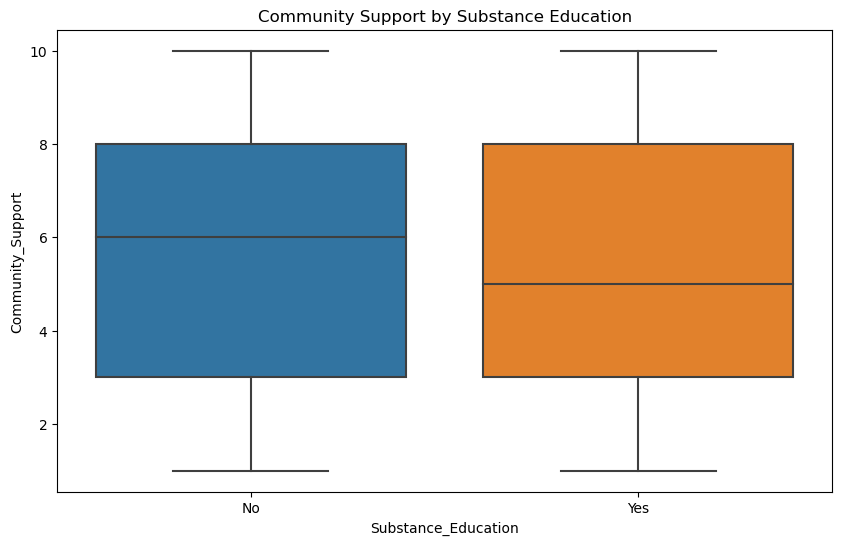

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Substance_Education', y='Community_Support', data=df)
plt.title('Community Support by Substance Education')
plt.show()

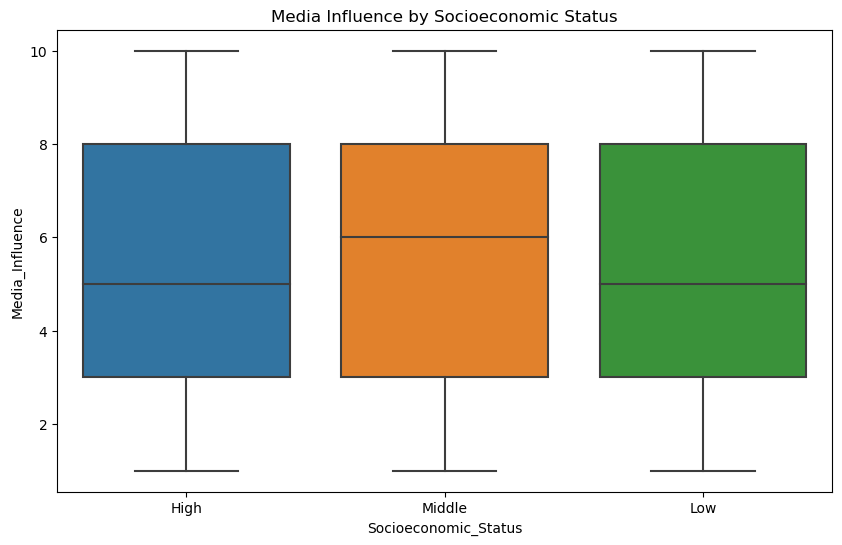

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Socioeconomic_Status', y='Media_Influence', data=df)
plt.title('Media Influence by Socioeconomic Status')
plt.show()

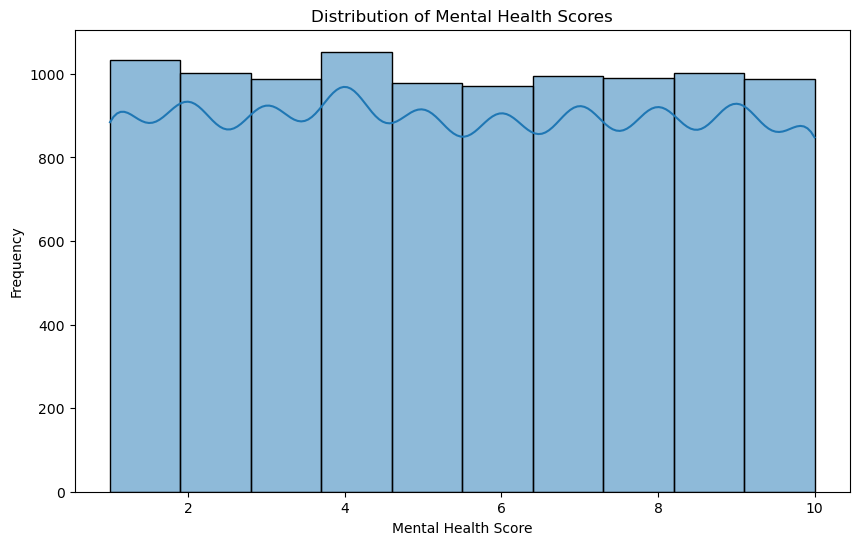

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mental_Health'], bins=10, kde=True)
plt.title('Distribution of Mental Health Scores')
plt.xlabel('Mental Health Score')
plt.ylabel('Frequency')
plt.show()

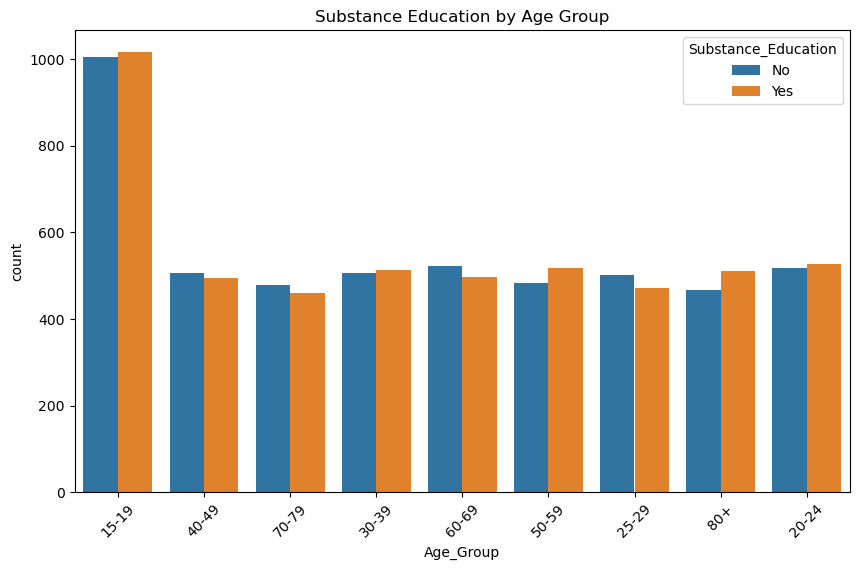

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Substance_Education', data=df)
plt.title('Substance Education by Age Group')
plt.xticks(rotation=45)
plt.show()

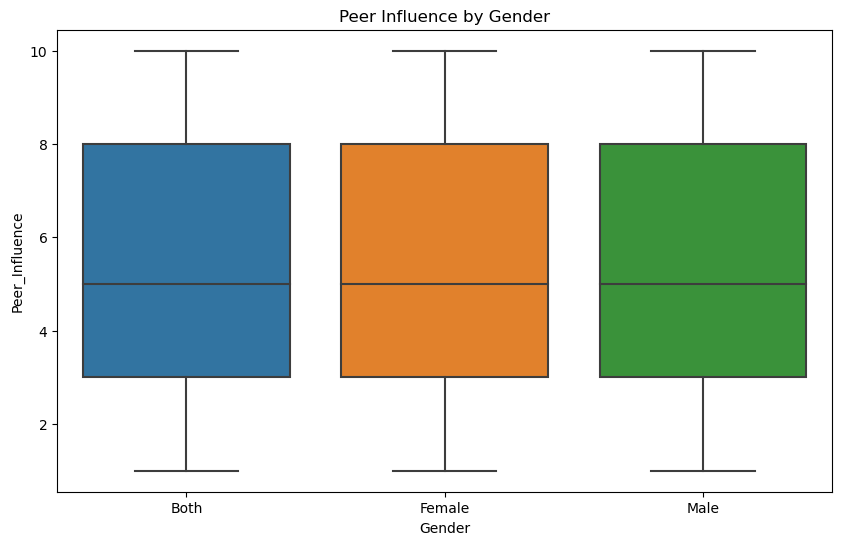

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Peer_Influence', data=df)
plt.title('Peer Influence by Gender')
plt.show()

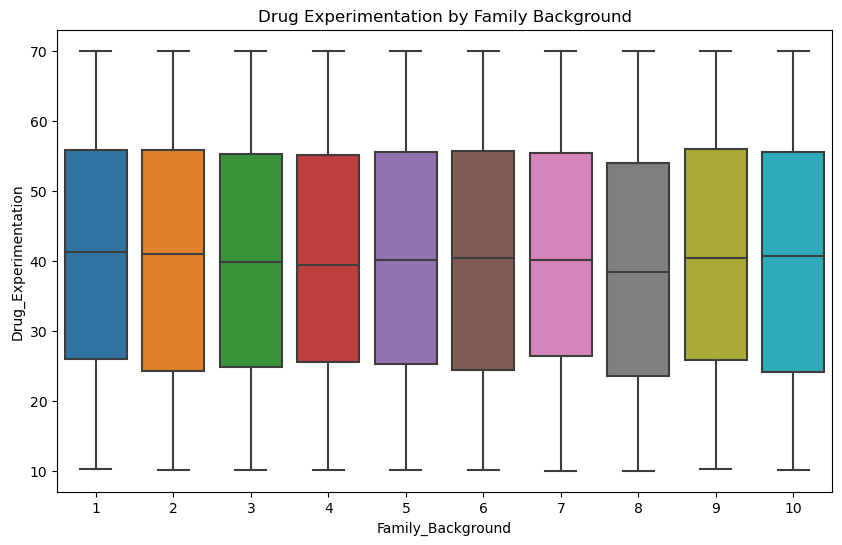

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family_Background', y='Drug_Experimentation', data=df)
plt.title('Drug Experimentation by Family Background')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15304\1629546566.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Drug_Experimentation', ci=None)


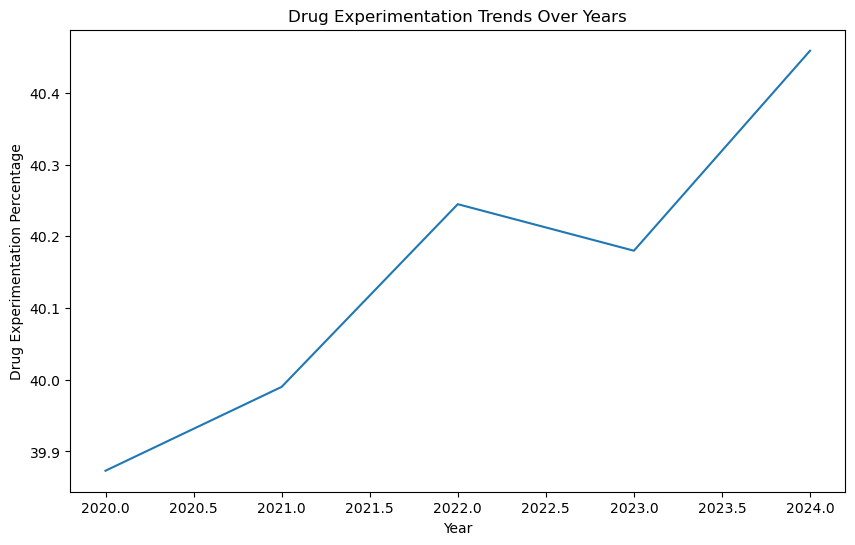

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Drug_Experimentation', ci=None)
plt.title('Drug Experimentation Trends Over Years')
plt.ylabel('Drug Experimentation Percentage')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15304\3325049054.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Smoking_Prevalence', ci=None)


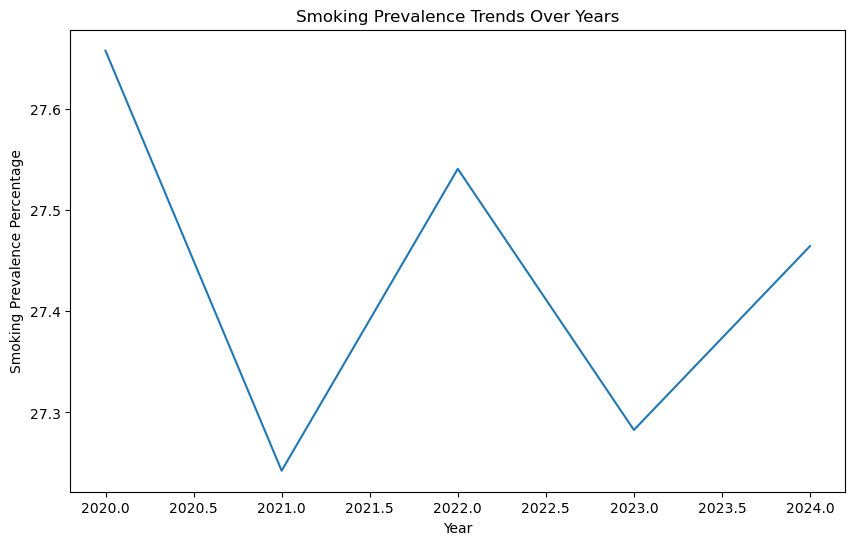

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Smoking_Prevalence', ci=None)
plt.title('Smoking Prevalence Trends Over Years')
plt.ylabel('Smoking Prevalence Percentage')
plt.show()

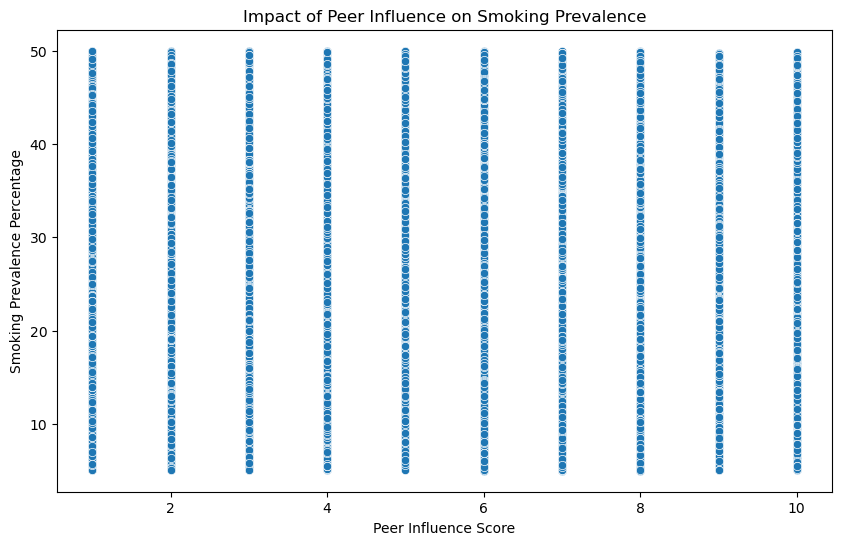

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Peer_Influence', y='Smoking_Prevalence', data=df)
plt.title('Impact of Peer Influence on Smoking Prevalence')
plt.xlabel('Peer Influence Score')
plt.ylabel('Smoking Prevalence Percentage')
plt.show()

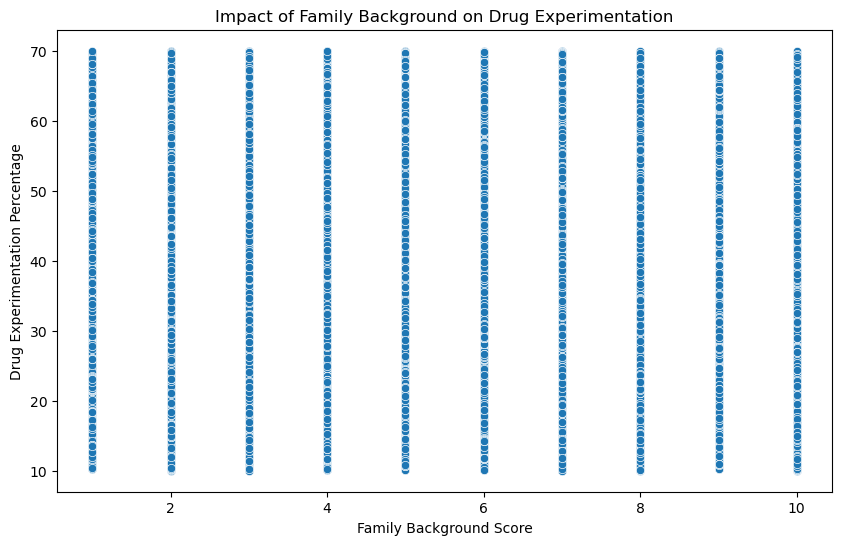

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Family_Background', y='Drug_Experimentation', data=df)
plt.title('Impact of Family Background on Drug Experimentation')
plt.xlabel('Family Background Score')
plt.ylabel('Drug Experimentation Percentage')
plt.show()

In [29]:
avg_smoking = df.groupby('Age_Group')['Smoking_Prevalence'].mean().reset_index()
print(avg_smoking)

  Age_Group  Smoking_Prevalence
0     15-19           27.765047
1     20-24           27.430689
2     25-29           27.269035
3     30-39           27.671166
4     40-49           27.292827
5     50-59           27.518152
6     60-69           27.012245
7     70-79           27.250597
8       80+           27.398059


In [30]:
avg_drug = df.groupby('Age_Group')['Drug_Experimentation'].mean().reset_index()
print(avg_drug)

  Age_Group  Drug_Experimentation
0     15-19             40.473033
1     20-24             39.869359
2     25-29             40.659107
3     30-39             40.454172
4     40-49             40.138112
5     50-59             39.555804
6     60-69             40.097647
7     70-79             38.831013
8       80+             40.898836


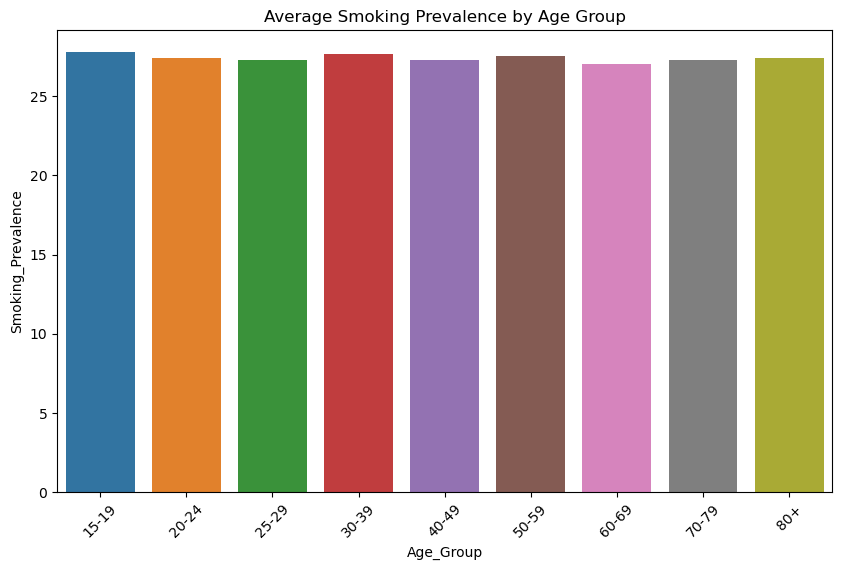

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Smoking_Prevalence', data=avg_smoking)
plt.title('Average Smoking Prevalence by Age Group')
plt.xticks(rotation=45)
plt.show()

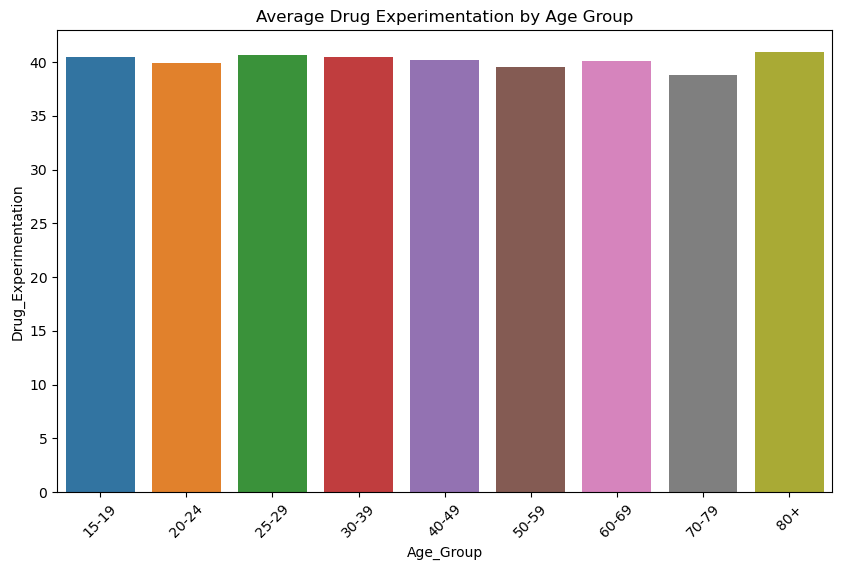

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Drug_Experimentation', data=avg_drug)
plt.title('Average Drug Experimentation by Age Group')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


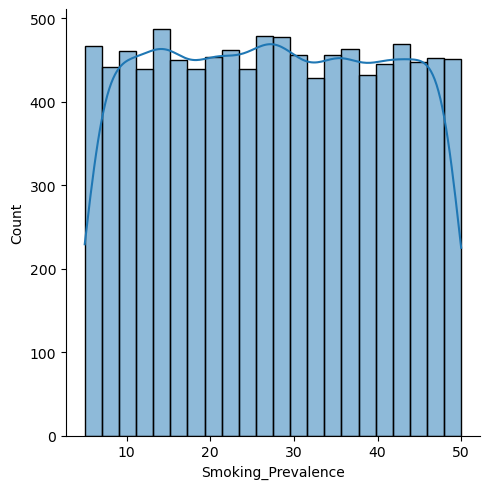

In [33]:
#Probability Distribution of Data
sns.displot(df.Smoking_Prevalence, kde = True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd

# Preprocess data
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store model performance
model_performance = {}

# List of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    model_performance[model_name] = rmse
    print(f"{model_name} RMSE: {rmse:.3f}")

print("\nModel performance:", model_performance)



Linear Regression RMSE: 0.000
Decision Tree RMSE: 0.012
Random Forest RMSE: 0.007
Support Vector Machine RMSE: 12.480
k-Nearest Neighbors RMSE: 0.767

Model performance: {'Linear Regression': 1.4471731077387922e-14, 'Decision Tree': 0.01212298093154756, 'Random Forest': 0.006548243021350282, 'Support Vector Machine': 12.479622054712507, 'k-Nearest Neighbors': 0.7673609103066605}
